In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
from scipy.stats import shapiro
import seaborn as sns

In [3]:
file_path = Path('Resources/cleaned_data.csv')
df = pd.read_csv(file_path)
df.head()

,sex,age,education,smokingStatus,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,CHDRisk,MAP
0,1.0,39,4,0.0,0,0,0,0,0,195,26.97,80,77,0,82.000000
1,0.0,46,2,0.0,0,0,0,0,0,250,28.73,95,76,0,94.333333
2,1.0,48,1,1.0,20,0,0,0,0,245,25.34,75,70,0,95.833333
3,0.0,61,3,1.0,30,0,0,1,0,225,28.58,65,103,1,113.333333
4,0.0,46,3,1.0,23,0,0,0,0,285,23.10,85,85,0,99.333333


In [4]:
# Dropping columns based off PCA analysis
df_reduced = df.drop(columns=['sex', 'BPMeds', 'prevalentStroke', 'heartRate'])

In [5]:
df_reduced.head()

,age,education,smokingStatus,cigsPerDay,prevalentHyp,diabetes,totChol,BMI,glucose,CHDRisk,MAP
0,39,4,0.0,0,0,0,195,26.97,77,0,82.000000
1,46,2,0.0,0,0,0,250,28.73,76,0,94.333333
2,48,1,1.0,20,0,0,245,25.34,70,0,95.833333
3,61,3,1.0,30,1,0,225,28.58,103,1,113.333333
4,46,3,1.0,23,0,0,285,23.10,85,0,99.333333


In [6]:
# Correlation matrix to see which variables are highly correlated
corr_matrix = df_reduced.corr()
corr_matrix

,age,education,smokingStatus,cigsPerDay,prevalentHyp,diabetes,totChol,BMI,glucose,CHDRisk,MAP
age,1.000000,-0.159539,-0.210166,-0.188074,0.306814,0.107806,0.267608,0.136973,0.117708,0.231726,0.311994
education,-0.159539,1.000000,0.024852,0.012788,-0.079354,-0.036604,-0.013088,-0.135447,-0.029221,-0.065294,-0.095113
smokingStatus,-0.210166,0.024852,1.000000,0.774130,-0.106228,-0.042581,-0.049090,-0.158734,-0.051519,0.020456,-0.129967
cigsPerDay,-0.188074,0.012788,0.774130,1.000000,-0.068776,-0.036346,-0.028820,-0.084729,-0.051728,0.054620,-0.077191
prevalentHyp,0.306814,-0.079354,-0.106228,-0.068776,1.000000,0.080031,0.166769,0.302673,0.085675,0.180842,0.693639
diabetes,0.107806,-0.036604,-0.042581,-0.036346,0.080031,1.000000,0.047906,0.080647,0.611164,0.096247,0.074648
totChol,0.267608,-0.013088,-0.049090,-0.028820,0.166769,0.047906,1.000000,0.119351,0.048440,0.091655,0.207210
BMI,0.136973,-0.135447,-0.158734,-0.084729,0.302673,0.080647,0.119351,1.000000,0.074010,0.085135,0.378006
glucose,0.117708,-0.029221,-0.051519,-0.051728,0.085675,0.611164,0.048440,0.074010,1.000000,0.124500,0.097572
CHDRisk,0.231726,-0.065294,0.020456,0.054620,0.180842,0.096247,0.091655,0.085135,0.124500,1.000000,0.196968


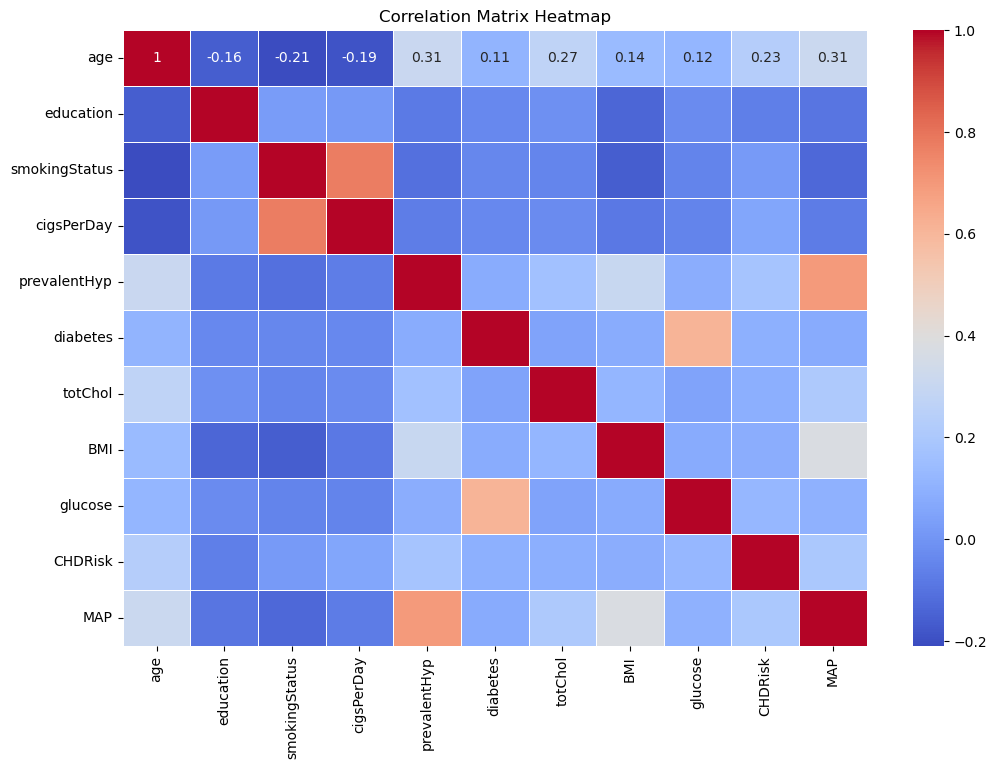

In [7]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [9]:
# Calculating the Variance Inflation Factor (VIF) to detect multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
features = df_reduced.drop(columns=['CHDRisk'])
vif_data = pd.DataFrame()
vif_data['Feature'] = features.columns
vif_data['VIF'] = [variance_inflation_factor(features.values, i) for i in range(len(features.columns))]

# Display VIF data
print(vif_data)

         Feature        VIF
0            age  37.941328
1      education   4.574955
2  smokingStatus   4.889669
3     cigsPerDay   3.958602
4   prevalentHyp   2.136986
5       diabetes   1.574136
6        totChol  31.198844
7            BMI  42.722359
8        glucose  19.087351
9            MAP  75.440120
